In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [2]:
train = pd.read_csv('E:/LTFS-AV-MLH/train.csv')
test = pd.read_csv('E:/LTFS-AV-MLH/test_bqCt9Pv.csv')


print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)

Shape of Train : (233154, 41)
Shape of Test : (112392, 40)


In [3]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [6]:
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [7]:
test.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,...,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,...,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,...,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,...,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [9]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [10]:
test.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [11]:
train['Employment.Type'].fillna('Unemployed',inplace=True)
test['Employment.Type'].fillna('Unemployed',inplace=True)

In [12]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: Employment.Type, dtype: int64

In [13]:
unique_id = test['UniqueID']
y_train = train.iloc[:, -1]
train = train.drop(['loan_default'], axis = 1)
train.shape

(233154, 40)

In [14]:
df = pd.concat([train,test],axis=0)
df.shape

(345546, 40)

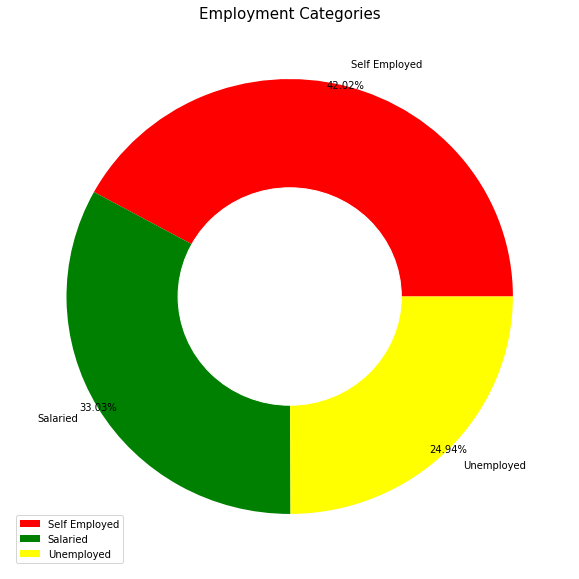

In [15]:
size = [187, 147, 111]
colors = ['red', 'green', 'yellow']
labels = "Self Employed", "Salaried", "Unemployed" 
circle = plt.Circle((0, 0), 0.5, color = 'white')
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels,pctdistance = 1, autopct = '%.2f%%')
plt.title('Employment Categories', fontsize = 15)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [16]:
df['Employment.Type'] = df['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'),(2,1,0))

In [17]:
print("Total Unique Ids :", df['UniqueID'].nunique())
print("Total Unique Branches :", df['branch_id'].nunique())
print("Total Unique Suppliers :", df['supplier_id'].nunique())
print("Total Unique Manufactures :", df['manufacturer_id'].nunique())
print("Total Unique Current pincode Ids :", df['Current_pincode_ID'].nunique())
print("Total Unique State IDs :",df['State_ID'].nunique())
print("Total Unique Employee code IDs :", df['Employee_code_ID'].nunique())

Total Unique Ids : 345546
Total Unique Branches : 82
Total Unique Suppliers : 3089
Total Unique Manufactures : 12
Total Unique Current pincode Ids : 7096
Total Unique State IDs : 22
Total Unique Employee code IDs : 3398


c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


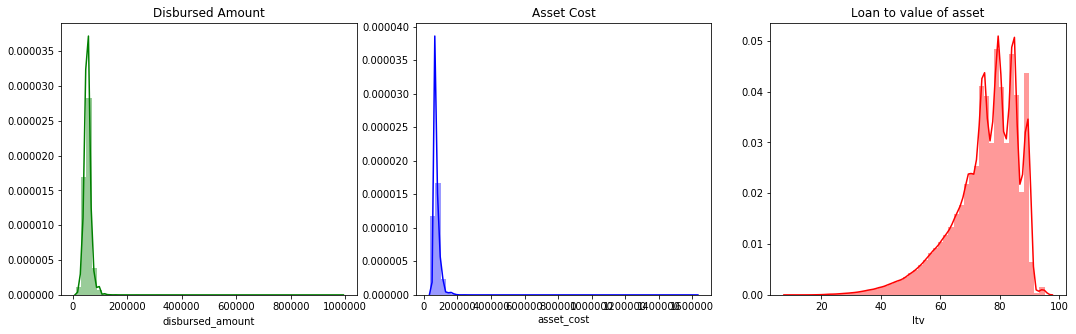

In [18]:
#Analysing first three columns of data containing disbursed amount , asset cost and loan to value of asset
plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sbn.distplot(df['disbursed_amount'],  color = 'green')
plt.title('Disbursed Amount')

plt.subplot(1, 3, 2)
sbn.distplot(df['asset_cost'], color = 'blue')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sbn.distplot(df['ltv'], color = 'red')
plt.title('Loan to value of asset')

plt.show()

c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Birth Years')

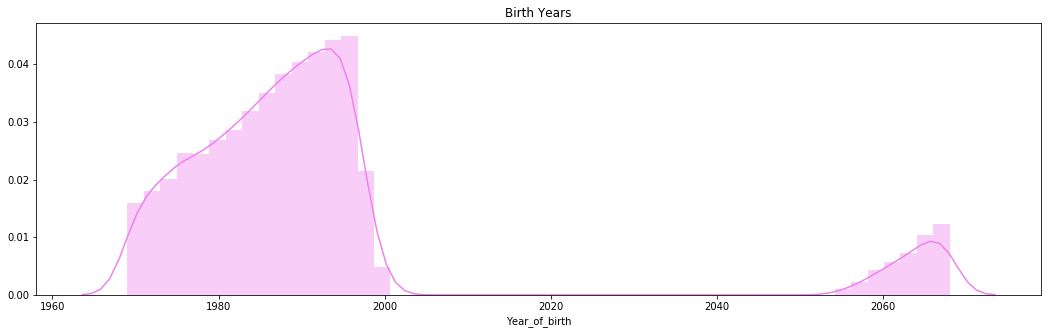

In [19]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'] , errors = 'coerce')
df['Year_of_birth'] = df['Date.of.Birth'].dt.year
sbn.distplot(df['Year_of_birth'], color = 'Violet')
plt.title('Birth Years')

In [20]:
df['Passport_flag'].value_counts()

0    344835
1       711
Name: Passport_flag, dtype: int64

In [21]:
df['Driving_flag'].value_counts()

0    338249
1      7297
Name: Driving_flag, dtype: int64

In [22]:
df['VoterID_flag'].value_counts()

0    298155
1     47391
Name: VoterID_flag, dtype: int64

In [23]:
df['PAN_flag'].value_counts()

0    306392
1     39154
Name: PAN_flag, dtype: int64

In [24]:
df['Aadhar_flag'].value_counts()

1    293663
0     51883
Name: Aadhar_flag, dtype: int64

In [25]:
df['MobileNo_Avl_Flag'].value_counts()

1    345546
Name: MobileNo_Avl_Flag, dtype: int64

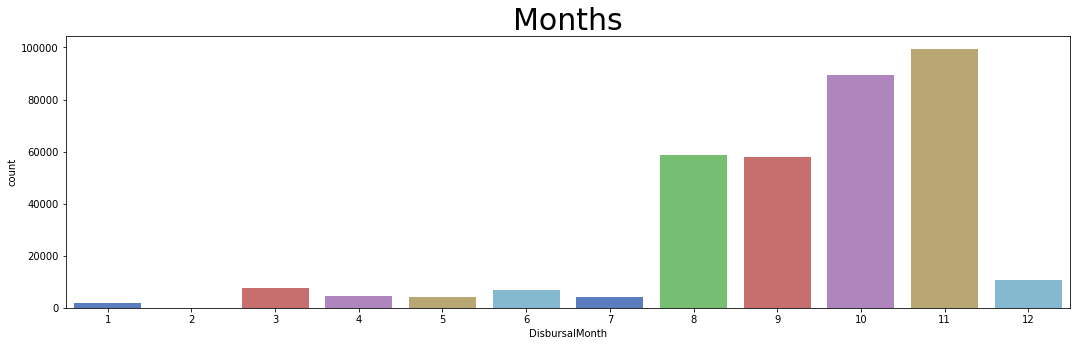

In [26]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors = 'coerce')
df['DisbursalMonth'] = df['DisbursalDate'].dt.month
df['DisbursalMonth'].value_counts()
plt.rcParams['figure.figsize'] = (18, 5)
sbn.countplot(df['DisbursalMonth'], palette = 'muted')
plt.title('Months', fontsize = 30)
plt.show()

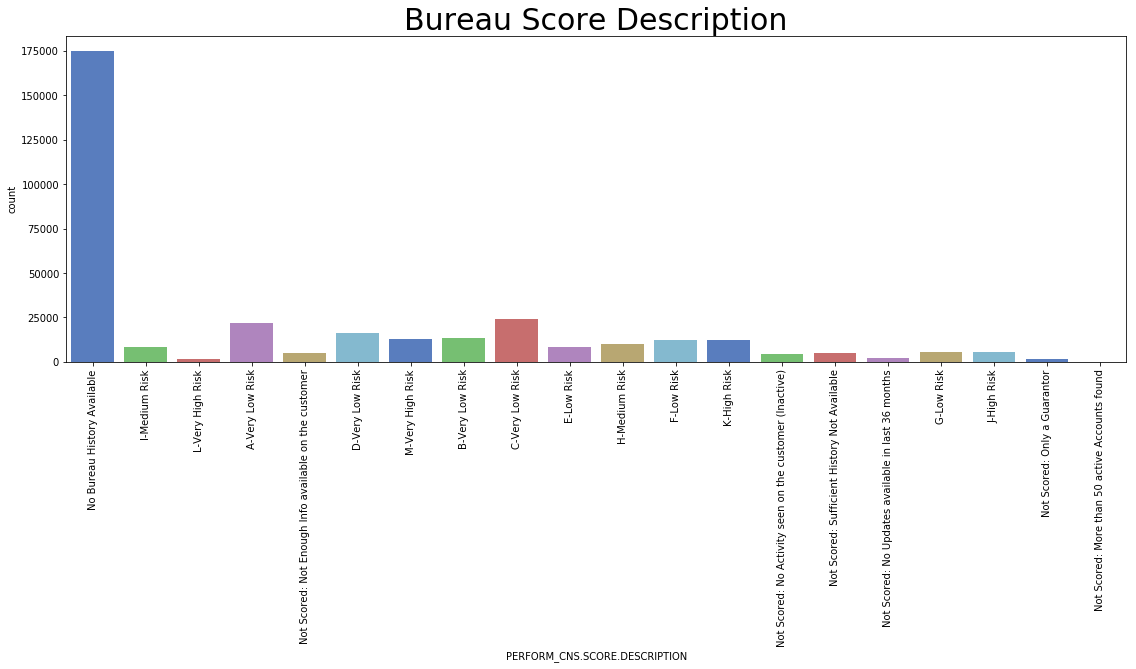

In [27]:
plt.rcParams['figure.figsize'] = (19, 6)
sbn.countplot(df['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'muted')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


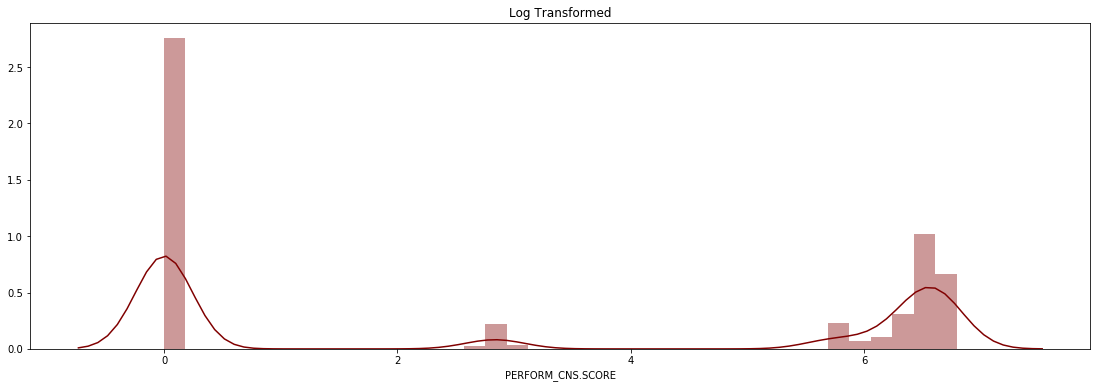

In [28]:
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

#plotting CNS score after getting its log tranformed values for normality of data
df['PERFORM_CNS.SCORE'] = np.log1p(df['PERFORM_CNS.SCORE'])
sbn.distplot(df['PERFORM_CNS.SCORE'], color = 'maroon')
plt.title('Log Transformed')

plt.show()

c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


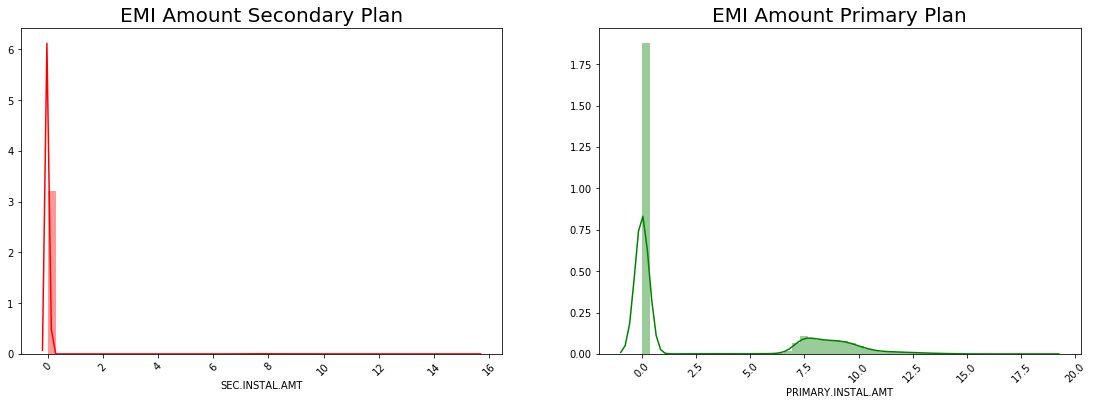

In [29]:
df['PRIMARY.INSTAL.AMT'] = np.log1p(df['PRIMARY.INSTAL.AMT'])
df['SEC.INSTAL.AMT'] = np.log1p(df['SEC.INSTAL.AMT'])

plt.subplot(1, 2, 1)
sbn.distplot(df['SEC.INSTAL.AMT'], color = 'red')
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sbn.distplot(df['PRIMARY.INSTAL.AMT'],color = 'green')
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 <a list of 10 Text xticklabel objects>)

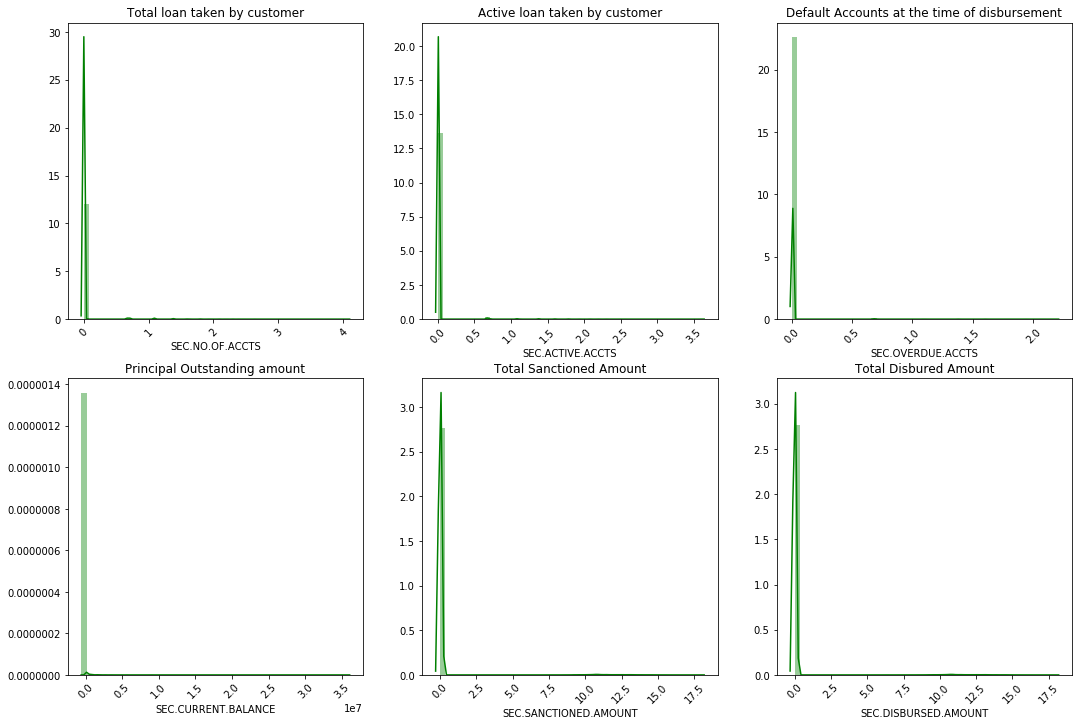

In [30]:
df['SEC.NO.OF.ACCTS'] = np.log1p(df['SEC.NO.OF.ACCTS'])
df['SEC.ACTIVE.ACCTS'] = np.log1p(df['SEC.ACTIVE.ACCTS'])
df['SEC.OVERDUE.ACCTS'] = np.log1p(df['SEC.OVERDUE.ACCTS'])
#df['SEC.CURRENT.BALANCE'] = np.log1p(df['SEC.CURRENT.BALANCE'])
df['SEC.SANCTIONED.AMOUNT'] = np.log1p(df['SEC.SANCTIONED.AMOUNT'])
df['SEC.DISBURSED.AMOUNT'] = np.log1p(df['SEC.DISBURSED.AMOUNT'])

#  filling  missing values in sec.current.balance
df['SEC.CURRENT.BALANCE'].fillna(df['SEC.CURRENT.BALANCE'].mean(), inplace = True)


# distribution for different attributesof secondary accounts


plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sbn.distplot(df['SEC.NO.OF.ACCTS'], color = 'green')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sbn.distplot(df['SEC.ACTIVE.ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sbn.distplot(df['SEC.OVERDUE.ACCTS'], color = 'green')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sbn.distplot(df['SEC.CURRENT.BALANCE'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sbn.distplot(df['SEC.SANCTIONED.AMOUNT'], color = 'green')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sbn.distplot(df['SEC.DISBURSED.AMOUNT'], color = 'green')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


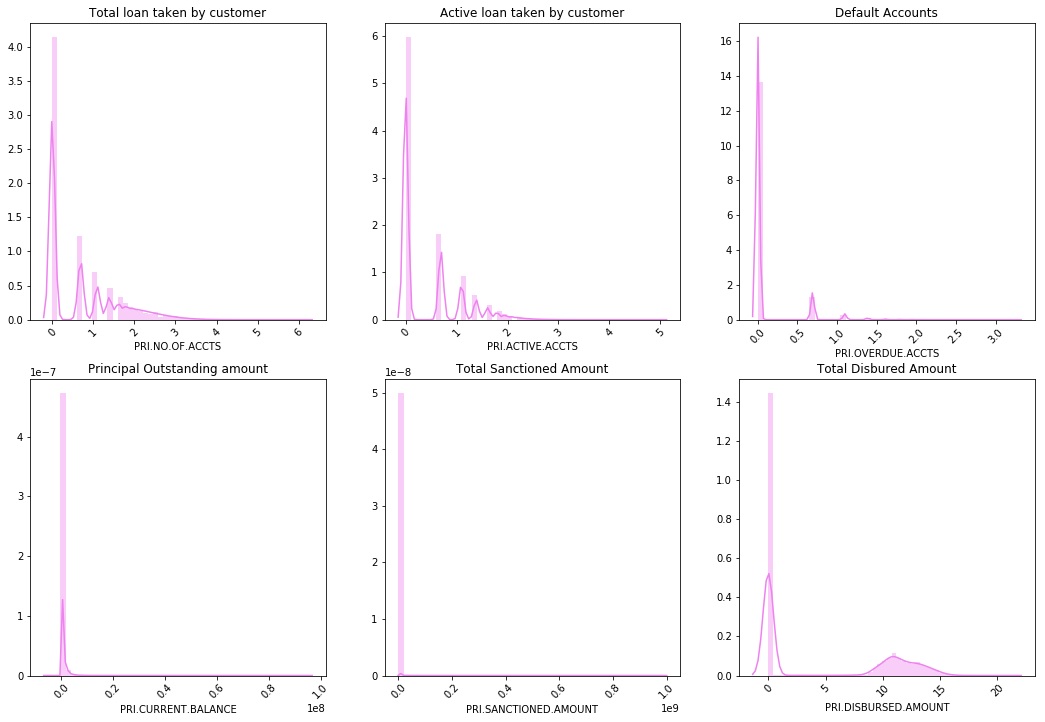

In [31]:
df['PRI.NO.OF.ACCTS'] = np.log1p(df['PRI.NO.OF.ACCTS'])
df['PRI.ACTIVE.ACCTS'] = np.log1p(df['PRI.ACTIVE.ACCTS'])
df['PRI.OVERDUE.ACCTS'] = np.log1p(df['PRI.OVERDUE.ACCTS'])
#df['PRI.CURRENT.BALANCE'] = np.log1p(df['PRI.CURRENT.BALANCE'])
#df['PRI.SANCTIONED.AMOUNT'] = np.log1p(df['PRI.SANCTIONED.AMOUNT'])
df['PRI.DISBURSED.AMOUNT'] = np.log1p(df['PRI.DISBURSED.AMOUNT'])


#  filling  missing values in sec.current.balance
df['PRI.CURRENT.BALANCE'].fillna(df['PRI.CURRENT.BALANCE'].mean(), inplace = True)
df['PRI.SANCTIONED.AMOUNT'].fillna(df['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)

# plotting distribution plots for these attributes

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sbn.distplot(df['PRI.NO.OF.ACCTS'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sbn.distplot(df['PRI.ACTIVE.ACCTS'], color = 'violet')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sbn.distplot(df['PRI.OVERDUE.ACCTS'], color = 'violet')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sbn.distplot(df['PRI.CURRENT.BALANCE'], color = 'violet')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sbn.distplot(df['PRI.SANCTIONED.AMOUNT'], color = 'violet')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sbn.distplot(df['PRI.DISBURSED.AMOUNT'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()


Text(0.5,1,'No. of Inquiries')

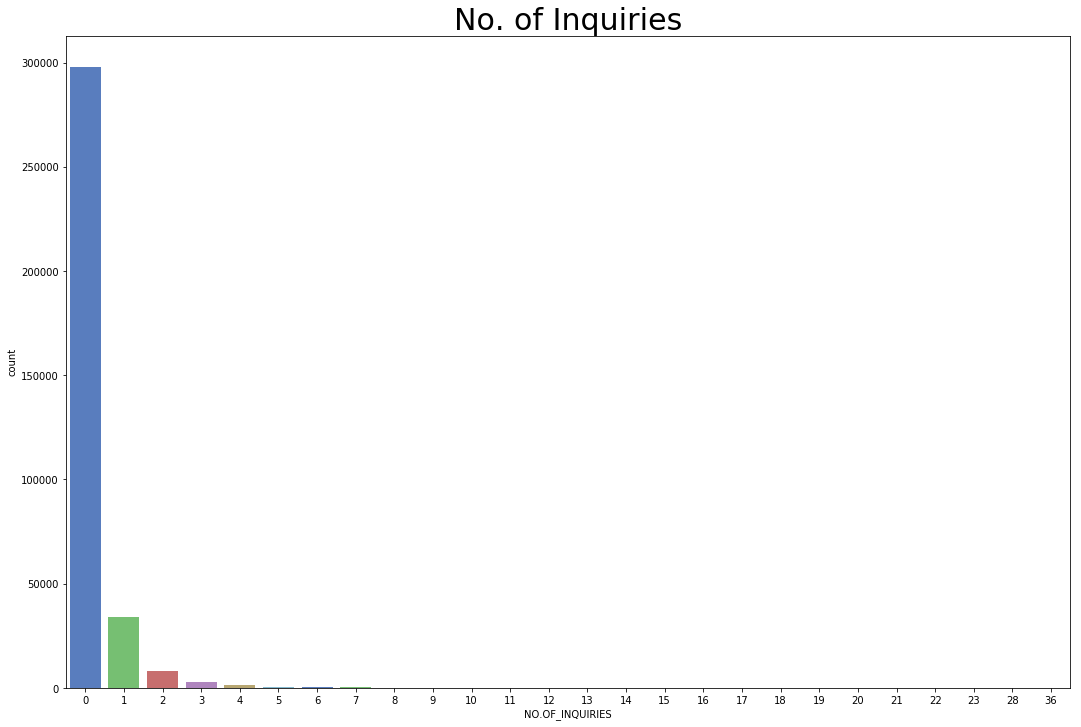

In [32]:
sbn.countplot(df['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

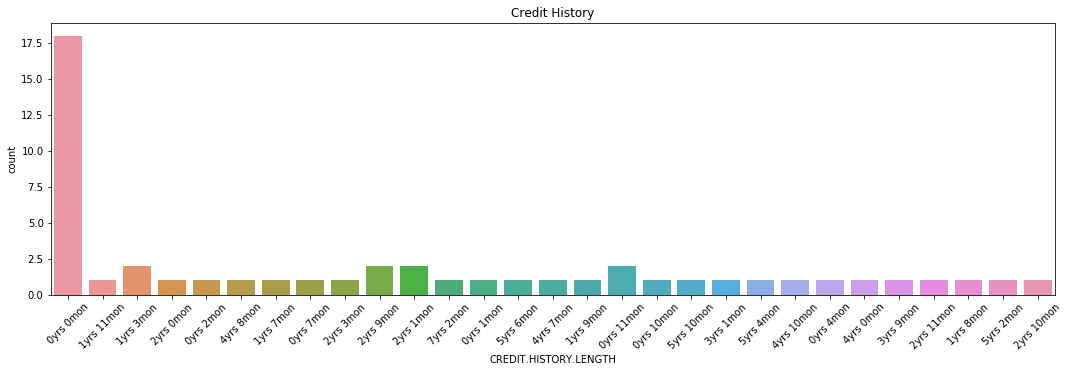

In [33]:
plt.rcParams['figure.figsize'] = (18, 5)
sbn.countplot(df['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

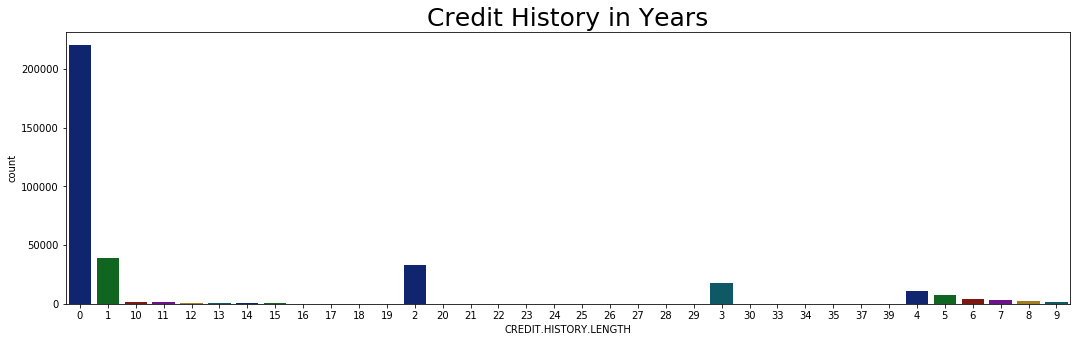

In [34]:
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
plt.rcParams['figure.figsize'] = (18, 5)
sbn.countplot(df['CREDIT.HISTORY.LENGTH'], palette = 'dark')
plt.title('Credit History in Years', fontsize = 25)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

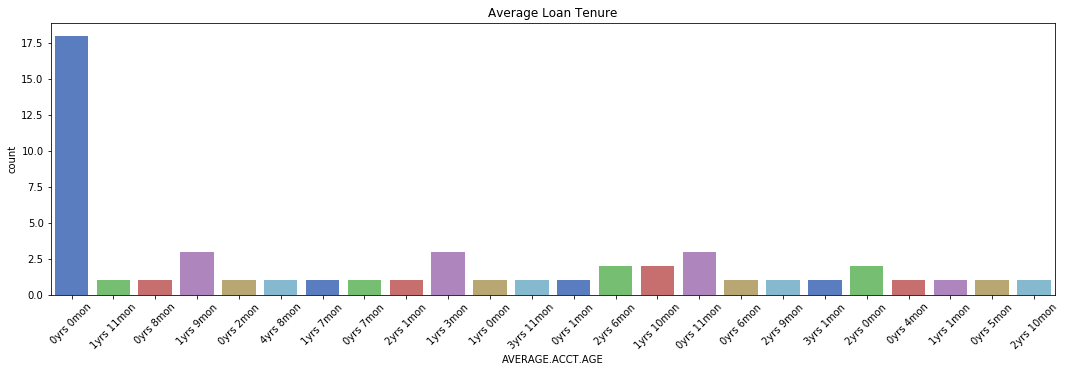

In [35]:
sbn.countplot(df['AVERAGE.ACCT.AGE'].head(50), palette = 'muted')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

In [36]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])

In [37]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     319144
1      21684
2       3550
3        790
4        220
5         78
6         29
7         21
8         10
9          7
12         5
11         3
10         2
20         1
18         1
16         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [38]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     272341
1      45965
2      15618
3       6161
4       2636
5       1287
6        625
7        383
8        197
9        109
10        82
11        47
12        28
13        18
14        11
17         9
16         8
15         4
19         4
20         4
18         2
22         2
23         2
28         1
21         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [39]:
df['branch_id'] = df['branch_id'].astype('category')
df['manufacturer_id'] = df['manufacturer_id'].astype('category')
df['State_ID'] = df['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['branch_id'] = le.fit_transform(df['branch_id'])
df['manufacturer_id'] = le.fit_transform(df['manufacturer_id'])
df['State_ID'] = le.fit_transform(df['State_ID'])

In [40]:
df = df.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID'], axis = 1)
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Year_of_birth',
       'DisbursalMonth'],
      dtype='object')

In [41]:
y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [42]:
x_train = df.iloc[:233154,:]
x_test = df.iloc[233154:,:]

print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 36)
Shape of test : (112392, 36)


In [43]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x_train, y_train.values.ravel()) 

print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 36)
Shape of y: (365086,)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(292068, 36)
(292068,)
(73018, 36)
(73018,)


In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64, float64, object were all converted to float64 by StandardScaler.
  


c:\users\harsh\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9863867318569648
Testing Accuarcy:  0.8435728176613986
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     36647
           1       0.93      0.74      0.83     36371

   micro avg       0.84      0.84      0.84     73018
   macro avg       0.86      0.84      0.84     73018
weighted avg       0.86      0.84      0.84     73018



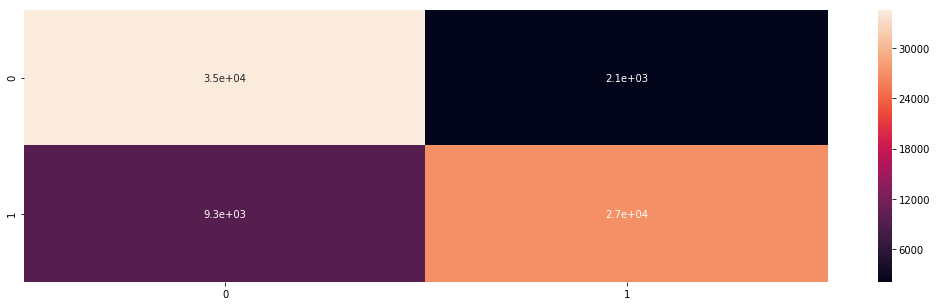

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)
#y_pred = model_rf.predict(data)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

#making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

#making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sbn.heatmap(cm, annot = True)

Training Accuracy:  0.810126408918471
Testing Accuarcy:  0.8081705880741735
              precision    recall  f1-score   support

           0       0.76      0.90      0.83     36647
           1       0.88      0.71      0.79     36371

   micro avg       0.81      0.81      0.81     73018
   macro avg       0.82      0.81      0.81     73018
weighted avg       0.82      0.81      0.81     73018



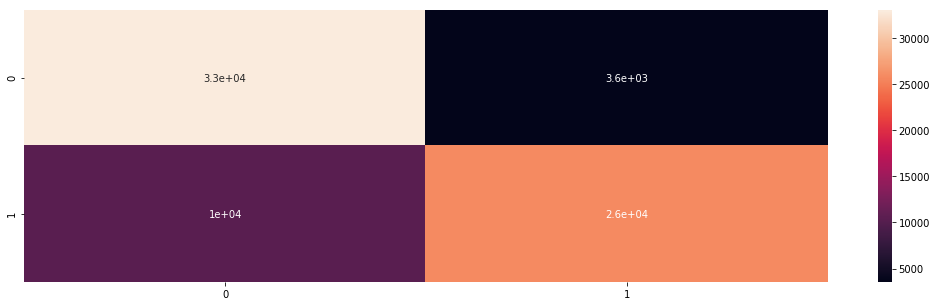

In [47]:
# ADA BOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(x_train, y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sbn.heatmap(cm, annot = True)

Training Accuracy:  0.8458167276113782
Testing Accuarcy:  0.8434495603823715
              precision    recall  f1-score   support

           0       0.76      0.99      0.86     36647
           1       0.99      0.69      0.81     36371

   micro avg       0.84      0.84      0.84     73018
   macro avg       0.88      0.84      0.84     73018
weighted avg       0.88      0.84      0.84     73018



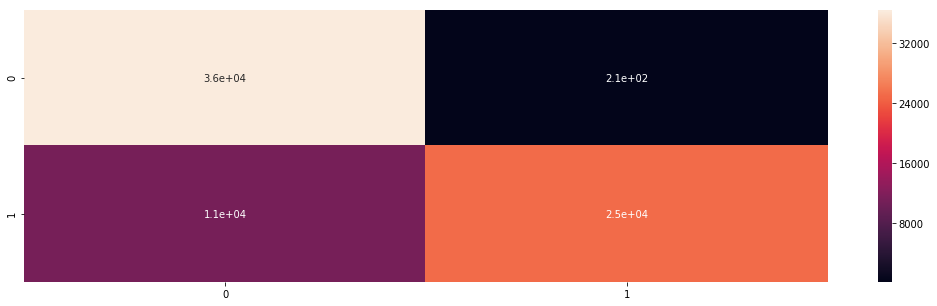

In [48]:
# Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sbn.heatmap(cm, annot = True)

In [51]:
y_pred_rf = model_rf.predict(x_test)
y_pred_ada = model_ada.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)

In [52]:
predictions = y_pred_rf*0.3 + y_pred_ada*0.2 + y_pred_xgb*0.2 + y_pred_xgb*0.3

In [55]:
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_rf})

In [56]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
